# Importing Dependencies

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline

# Warnings handling
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving FDVA.csv to FDVA.csv


In [3]:
#Importing Dataset
df = pd.read_csv('FDVA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-05-09,9.469697,9.469697,9.469697,9.469697,9.469697,317
1,2007-05-10,9.469697,9.469697,9.469697,9.469697,9.469697,0
2,2007-05-11,9.469697,9.469697,9.311869,9.469697,9.469697,8078
3,2007-05-14,9.469697,9.469697,9.311869,9.311869,9.311869,1109
4,2007-05-15,9.311869,9.311869,9.311869,9.311869,9.311869,0


In [4]:
df.shape

(3955, 7)

In [5]:
df.reset_index(inplace=True)
df.describe()

,index,Open,High,Low,Close,Adj Close,Volume
count,3955.000000,3955.000000,3955.000000,3955.000000,3955.000000,3955.000000,3955.000000
mean,1977.000000,8.306488,8.333968,8.279323,8.306555,8.306555,2396.333755
std,1141.854486,3.406523,3.414851,3.401231,3.408811,3.408811,9728.646923
min,0.000000,2.209596,2.209596,2.209596,2.209596,2.209596,0.000000
25%,988.500000,5.353535,5.366162,5.306818,5.366162,5.366162,0.000000
50%,1977.000000,8.190000,8.250000,8.181818,8.190909,8.190909,100.000000
75%,2965.500000,10.600000,10.615000,10.550000,10.600000,10.600000,1584.000000
max,3954.000000,15.050000,16.000000,14.900000,14.980000,14.980000,256400.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3955 entries, 0 to 3954
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      3955 non-null   int64  
 1   Date       3955 non-null   object 
 2   Open       3955 non-null   float64
 3   High       3955 non-null   float64
 4   Low        3955 non-null   float64
 5   Close      3955 non-null   float64
 6   Adj Close  3955 non-null   float64
 7   Volume     3955 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 247.3+ KB


# Check for Correlation

In [7]:
corr = df.corr(method='pearson')
corr

,index,Open,High,Low,Close,Adj Close,Volume
index,1.000000,0.774927,0.775916,0.774307,0.774767,0.774767,0.167185
Open,0.774927,1.000000,0.999540,0.999616,0.999438,0.999438,0.122494
High,0.775916,0.999540,1.000000,0.999098,0.999564,0.999564,0.125809
Low,0.774307,0.999616,0.999098,1.000000,0.999594,0.999594,0.119610
Close,0.774767,0.999438,0.999564,0.999594,1.000000,1.000000,0.122564
Adj Close,0.774767,0.999438,0.999564,0.999594,1.000000,1.000000,0.122564
Volume,0.167185,0.122494,0.125809,0.119610,0.122564,0.122564,1.000000


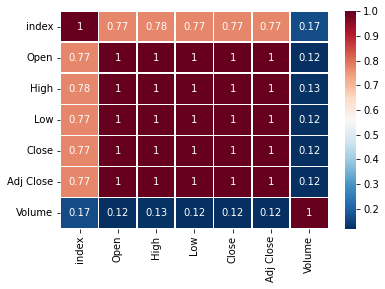

In [8]:
import seaborn as sb
sb.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,
 cmap='RdBu_r', annot=True, linewidth=0.5)

# Exploratory Data Analysis

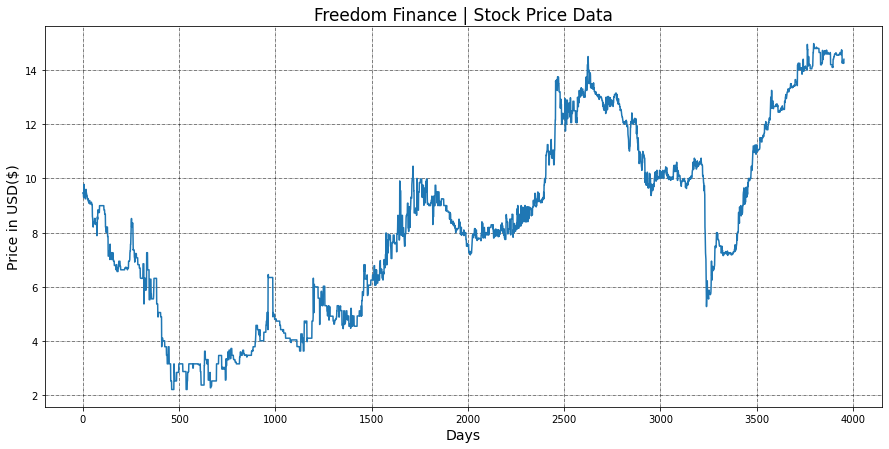

In [9]:
#Exploratory Data Analysis
df['Close'].plot(figsize=(15, 7))
plt.title("Freedom Finance | Stock Price Data", fontsize=17)
plt.ylabel('Price in USD($)', fontsize=14)
plt.xlabel('Days', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [10]:
df.tail()

,index,Date,Open,High,Low,Close,Adj Close,Volume
3950,3950,2023-01-17,14.30,14.30,14.30,14.30,14.30,100
3951,3951,2023-01-18,14.30,14.31,14.30,14.31,14.31,1800
3952,3952,2023-01-19,14.26,14.26,14.25,14.25,14.25,7400
3953,3953,2023-01-20,14.25,14.25,14.25,14.25,14.25,0
3954,3954,2023-01-23,14.40,14.40,14.40,14.40,14.40,100


In [11]:
#Prepare dataset to work with 
nflx_df=df[['Date','High','Open','Low','Close']]
nflx_df.head(10)

,Date,High,Open,Low,Close
0,2007-05-09,9.469697,9.469697,9.469697,9.469697
1,2007-05-10,9.469697,9.469697,9.469697,9.469697
2,2007-05-11,9.469697,9.469697,9.311869,9.469697
3,2007-05-14,9.469697,9.469697,9.311869,9.311869
4,2007-05-15,9.311869,9.311869,9.311869,9.311869
5,2007-05-16,9.785354,9.469697,9.469697,9.785354
6,2007-05-17,9.311869,9.311869,9.311869,9.311869
7,2007-05-18,9.311869,9.311869,9.311869,9.311869
8,2007-05-21,9.311869,9.311869,9.311869,9.311869
9,2007-05-22,9.469697,9.469697,9.469697,9.469697


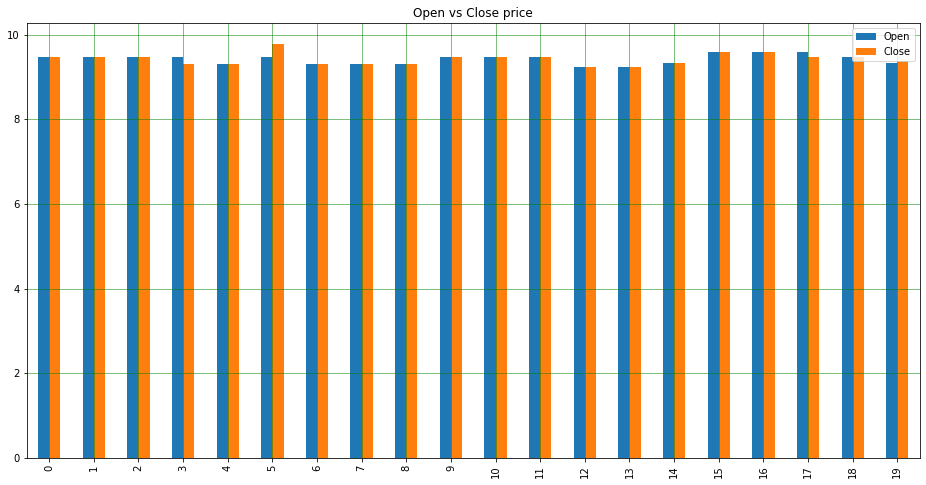

In [12]:
#Plot Open vs Close
nflx_df[['Open','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.title('Open vs Close price')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

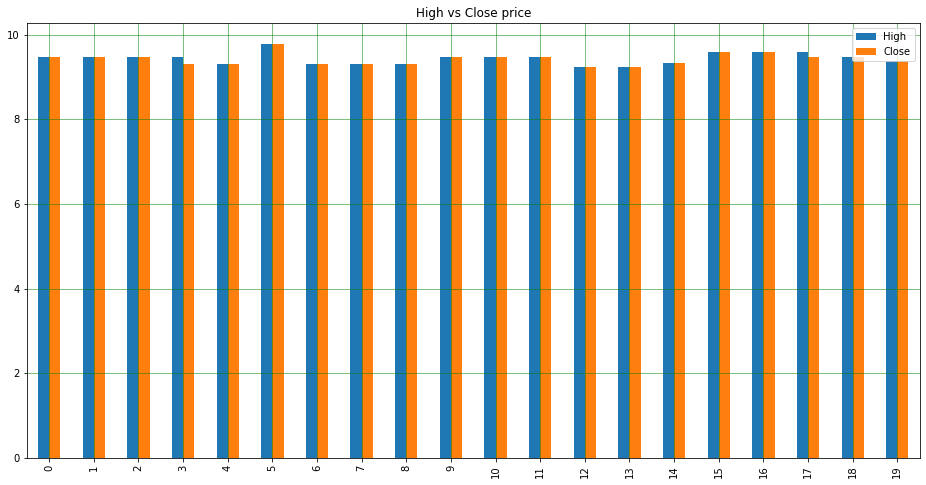

In [13]:
#Plot High vs Close
nflx_df[['High','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.title('High vs Close price')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

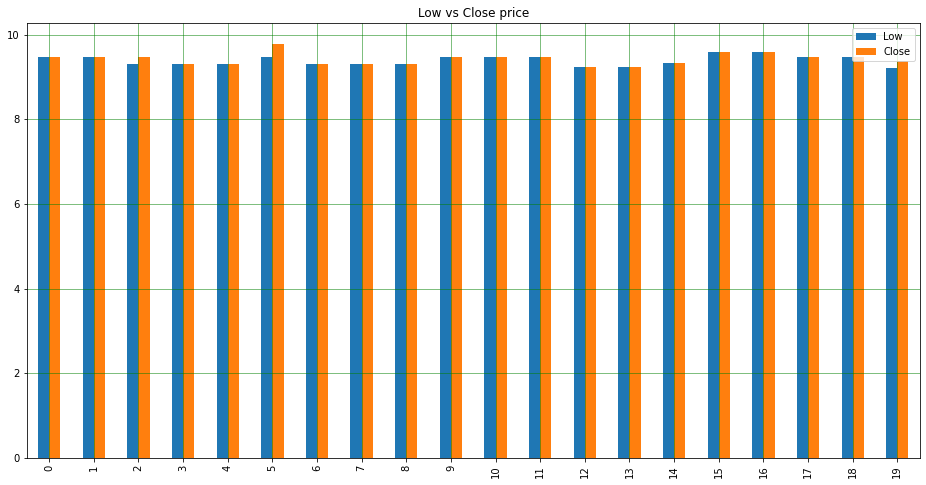

In [14]:
#Plot Low vs Close
nflx_df[['Low','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.title('Low vs Close price')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Model Training and Testing

In [15]:
nfx_df=nflx_df[['High','Open','Low','Close']]
nfx_df.head(10)

,High,Open,Low,Close
0,9.469697,9.469697,9.469697,9.469697
1,9.469697,9.469697,9.469697,9.469697
2,9.469697,9.469697,9.311869,9.469697
3,9.469697,9.469697,9.311869,9.311869
4,9.311869,9.311869,9.311869,9.311869
5,9.785354,9.469697,9.469697,9.785354
6,9.311869,9.311869,9.311869,9.311869
7,9.311869,9.311869,9.311869,9.311869
8,9.311869,9.311869,9.311869,9.311869
9,9.469697,9.469697,9.469697,9.469697


In [16]:
#separate Independent and dependent variable
X = nfx_df.iloc[:,nfx_df.columns !='Close']
Y = nfx_df.iloc[:, 3]

In [17]:
print(X.shape) #output: (3955, 3)
print(Y.shape) #output: (3955,)

(3955, 3)
(3955,)


In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.25)

In [19]:
print(x_train.shape) #output: (2966, 3)
print(x_test.shape) #output: (989, 3)
print(y_train.shape) #output: (2966,)
print(y_test.shape) #output: (989,)
#y_test to be evaluated with y_pred for Diff models

(2966, 3)
(989, 3)
(2966,)
(989,)


# Linear Regression Model Training and Testing


In [20]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred=lr_model.predict(x_test)

# Linear Regression Model Cross-Validation

In [22]:
from sklearn import model_selection
from sklearn.model_selection import KFold
kfold = model_selection.KFold(n_splits=20, random_state=100, shuffle=True)
results_kfold = model_selection.cross_val_score(lr_model, x_test, y_test.astype('int'), cv=kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  99.1641433582991


# Linear Regression Model - Data Visualization (Results)

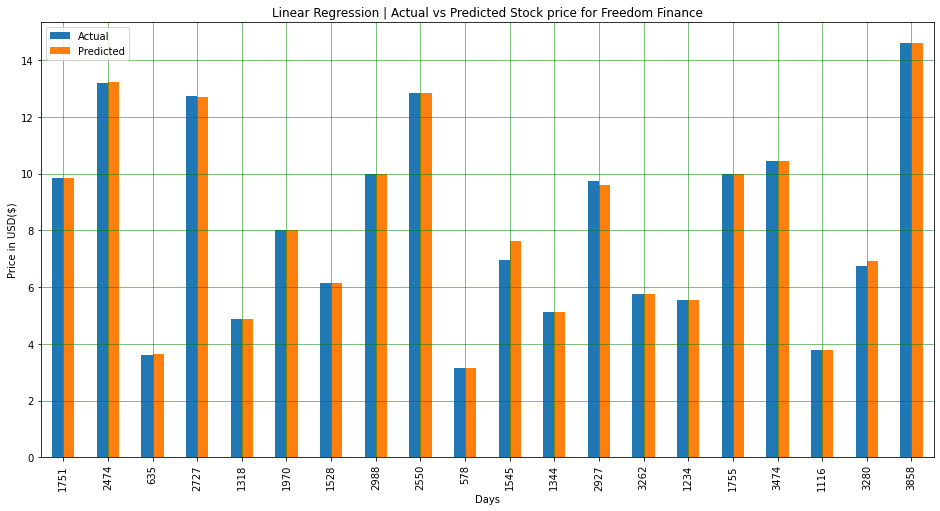

In [23]:
plot_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
plot_df.head(20).plot(kind='bar',figsize=(16,8))
plt.title('Linear Regression | Actual vs Predicted Stock price for Freedom Finance')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.ylabel('Price in USD($)')
plt.xlabel('Days')
plt.show()

# KNN Model Training and Testing

In [24]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors = 5)
knn_model=knn_regressor.fit(x_train,y_train)
y_knn_pred=knn_model.predict(x_test)

# KNN Cross-Validation


In [25]:
knn_kfold = model_selection.KFold(n_splits=20, random_state=100, shuffle=True)
results_kfold = model_selection.cross_val_score(knn_model, x_test, y_test.astype('int'), cv=knn_kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  99.6963703880953


# KNN Model - Data Visualization (Results)

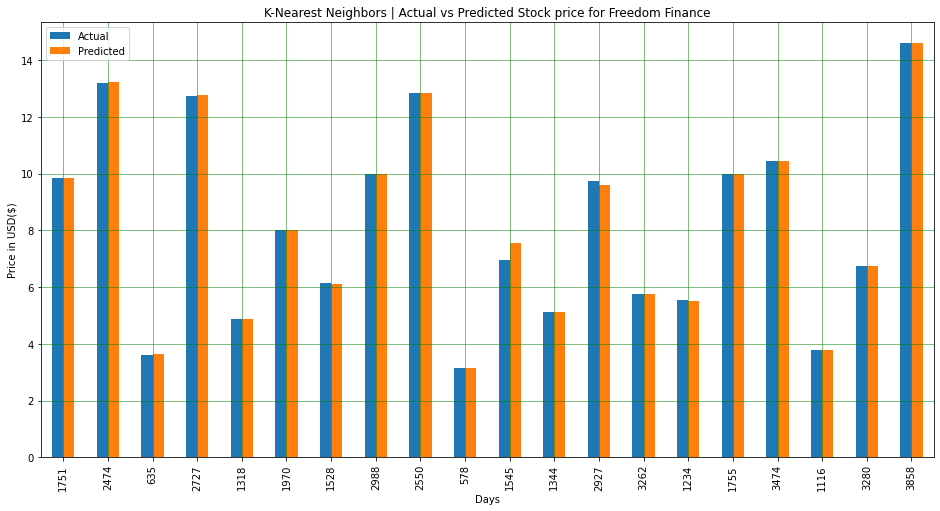

In [26]:
plot_knn_df=pd.DataFrame({'Actual':y_test,'Predicted':y_knn_pred})
plot_knn_df.head(20).plot(kind='bar',figsize=(16,8))
plt.title('K-Nearest Neighbors | Actual vs Predicted Stock price for Freedom Finance')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.ylabel('Price in USD($)')
plt.xlabel('Days')
plt.show()

# Linear Kernel SVM Model Training and Testing


In [27]:
from sklearn.svm import SVR
lin_svm_regressor = SVR(kernel='linear')
lin_svm_model=lin_svm_regressor.fit(x_train,y_train)
y_lin_svm_pred=lin_svm_model.predict(x_test)

# Linear Kernel SVM Model Cross-Validation

In [28]:
lin_svm_kfold = model_selection.KFold(n_splits=20, random_state=100, shuffle=True)
results_kfold = model_selection.cross_val_score(lin_svm_model, x_test, y_test.astype('int'), cv=lin_svm_kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  99.15113882554088


# Linear Kernel SVM Model - Data Visualization (Results)

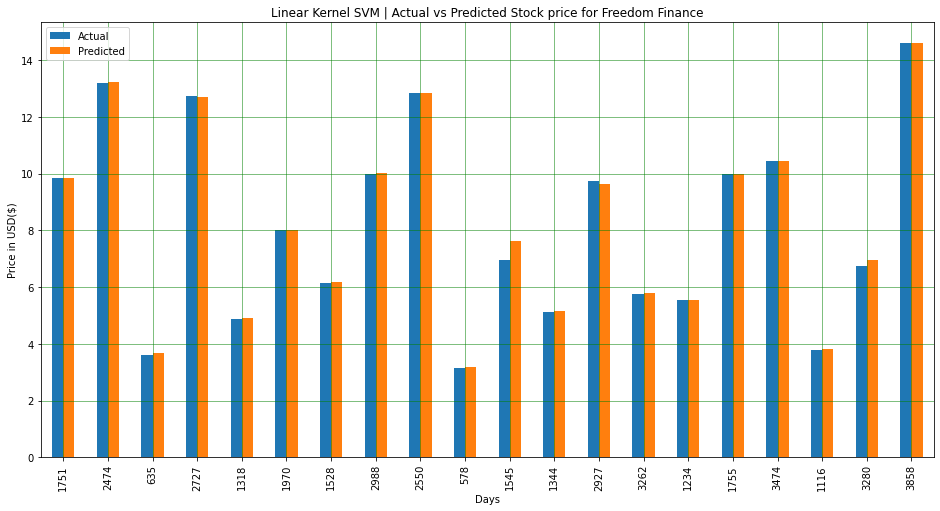

In [29]:
plot_lin_svm_df=pd.DataFrame({'Actual':y_test,'Predicted':y_lin_svm_pred})
plot_lin_svm_df.head(20).plot(kind='bar',figsize=(16,8))
plt.title('Linear Kernel SVM | Actual vs Predicted Stock price for Freedom Finance')
plt.ylabel('Price in USD($)')
plt.xlabel('Days')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Polynomial Kernel SVM Model Training and Testing


In [30]:
from sklearn.svm import SVR
poly_svm_regressor = SVR(kernel='poly')
poly_svm_model=poly_svm_regressor.fit(x_train,y_train)
y_poly_svm_pred=poly_svm_model.predict(x_test)

# Polynomial Kernel SVM Model Cross-Validation

In [31]:
poly_svm_kfold = model_selection.KFold(n_splits=20, random_state=100, shuffle=True)
results_kfold = model_selection.cross_val_score(poly_svm_model, x_test, y_test.astype('int'), cv=poly_svm_kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  85.77861259583258


# Polynomial Kernel SVM Model - Data Visualization (Results)

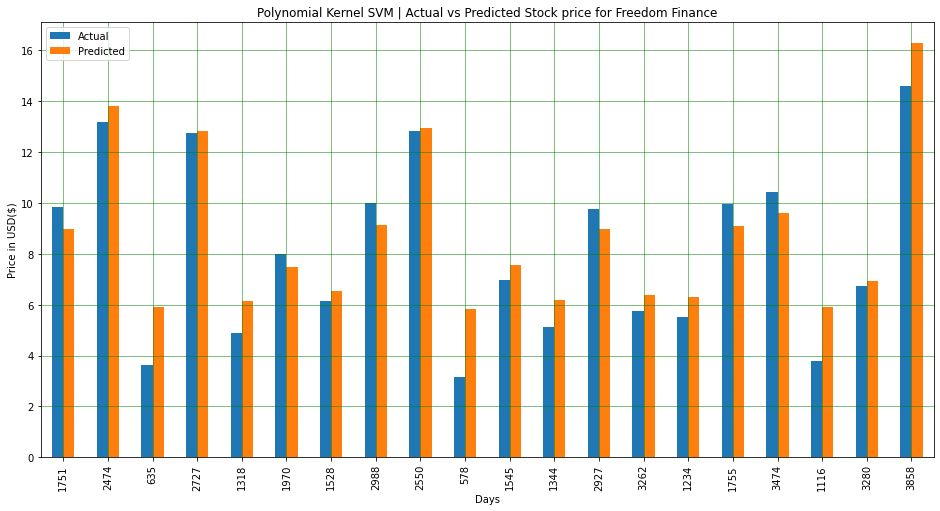

In [32]:
plot_poly_svm_df=pd.DataFrame({'Actual':y_test,'Predicted':y_poly_svm_pred})
plot_poly_svm_df.head(20).plot(kind='bar',figsize=(16,8))
plt.title('Polynomial Kernel SVM | Actual vs Predicted Stock price for Freedom Finance')
plt.ylabel('Price in USD($)')
plt.xlabel('Days')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# RBF Kernel SVM Model Training and Testing


In [33]:
from sklearn.svm import SVR
rbf_svm_regressor = SVR(kernel='rbf')
rbf_svm_model=rbf_svm_regressor.fit(x_train,y_train)
y_rbf_svm_pred=rbf_svm_model.predict(x_test)

# RBF Kernel SVM Model Cross-Validation

In [34]:
rbf_svm_kfold = model_selection.KFold(n_splits=20, random_state=100, shuffle=True)
results_kfold = model_selection.cross_val_score(rbf_svm_model, x_test, y_test.astype('int'), cv=rbf_svm_kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  99.16460980131106


# RBF Kernel SVM Model - Data Visualization (Results)

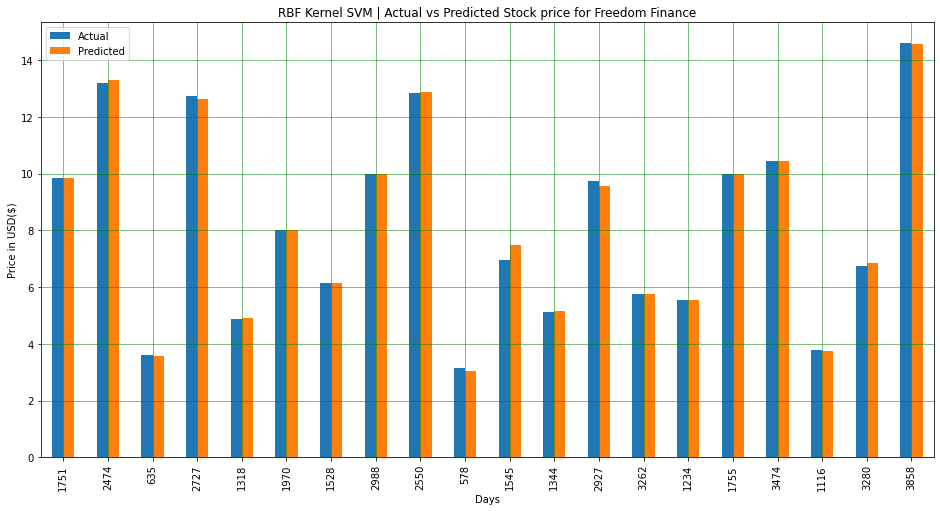

In [35]:
plot_rbf_svm_df=pd.DataFrame({'Actual':y_test,'Predicted':y_rbf_svm_pred})
plot_rbf_svm_df.head(20).plot(kind='bar',figsize=(16,8))
plt.title('RBF Kernel SVM | Actual vs Predicted Stock price for Freedom Finance')
plt.ylabel('Price in USD($)')
plt.xlabel('Days')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# RMSE (Root Mean Square Error)


In [36]:
from sklearn.metrics import mean_squared_error , r2_score
import math

In [37]:
lr_mse=math.sqrt(mean_squared_error(y_test,y_pred))
print('Linear Regression Model Root mean square error: ',lr_mse)
knn_mse=math.sqrt(mean_squared_error(y_test,y_knn_pred))
print('KNN Model Root mean square error: ',knn_mse)
lin_svm_mse=math.sqrt(mean_squared_error(y_test,y_lin_svm_pred))
print('Linear SVM Model Root mean square error: ',lin_svm_mse)
poly_svm_mse=math.sqrt(mean_squared_error(y_test,y_poly_svm_pred))
print('Polynomial SVM Model Root mean square error: ',poly_svm_mse)
rbf_svm_mse=math.sqrt(mean_squared_error(y_test,y_rbf_svm_pred))
print('RBF SVM Model Root mean square error: ',rbf_svm_mse)

Linear Regression Model Root mean square error:  0.06534930474540228
KNN Model Root mean square error:  0.07498400749155966
Linear SVM Model Root mean square error:  0.06999015081316805
Polynomial SVM Model Root mean square error:  1.3113681657061966
RBF SVM Model Root mean square error:  0.08256533549644425


# R2 or r-squared error

In [38]:
print('Linear Regression R2: ', r2_score(y_test, y_pred))
print('KNN R2: ', r2_score(y_test, y_knn_pred))
print('Linear SVM R2: ', r2_score(y_test, y_lin_svm_pred))
print('Polynomial SVM R2: ', r2_score(y_test, y_poly_svm_pred))
print('RBF SVM R2: ', r2_score(y_test, y_rbf_svm_pred))

Linear Regression R2:  0.999638753334321
KNN R2:  0.9995243809959913
Linear SVM R2:  0.9995856228844859
Polynomial SVM R2:  0.8545307573888835
RBF SVM R2:  0.9994233432178272
